In [1]:
import SimpleITK as sitk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

from platipy.imaging.label.comparison import (
    compute_metric_dsc,
    compute_metric_masd,
    compute_metric_hd,
    compute_volume
)

from platipy.imaging.label.utils import get_com


%matplotlib notebook

In [ ]:
model = "Task600_goldstandard"
path = "CHECKPOINT_CURVES/"+model

In [2]:
test_id_list = sorted([i.name[5:11] for i in Path("../experiments/OUTPUT/GOLDSTANDARD/").glob("*nii.gz")])
print("Found",len(test_id_list),"cases.")

Found 0 cases.


In [3]:
# # params

# folds = [0,1,2,3,4]
# chkpts = [10,20,30,40,50,60,70,80,90,100]

# # helpers
# distance = lambda a,b: np.linalg.norm(np.array(get_com(a, real_coords=True)) - np.array(get_com(b, real_coords=True)))

In [4]:
# model = "Task600_goldstandard"

# results = []

# for pt_id in test_id_list:
#     print(pt_id)
    
#     for fold in folds:
        
#         print(fold)
    
#         for chk in chkpts:
#             print(chk, end=", ")

#             # read segmentations
#             label_gt = sitk.ReadImage(f"../experiments/OUTPUT/GT/labelsTs/ISPY_{pt_id}.nii.gz", sitk.sitkUInt8)
#             label_nn = sitk.ReadImage(f"../experiments/OUTPUT/CHECKPOINT_CURVES/{model}/fold_{fold}/chk_{chk}/ISPY_{pt_id}.nii.gz", sitk.sitkUInt8)

#             results.append({
#                 "pt_id":pt_id,
#                 "chk":chk,

#                 "Volume_GT [cc]" : compute_volume(label_gt),
#                 "Volume_NN [cc]" : compute_volume(label_nn),

#                 "CoM_Distance [mm]" : distance(label_gt, label_nn),
#                 "DSC" : compute_metric_dsc(label_gt, label_nn),
#                 "MASD [mm]" : compute_metric_masd(label_gt, label_nn),
#                 "HD [mm]" : compute_metric_hd(label_gt, label_nn),
#             })
    
# df = pd.DataFrame(results)

In [65]:
# df.to_csv("../experiments/checkpoint_analysis.csv")

In [6]:
df = pd.read_csv("checkpoint_analysis.csv")

In [7]:
df.groupby("chk").mean()

,Unnamed: 0,pt_id,Volume_GT [cc],Volume_NN [cc],CoM_Distance [mm],DSC,MASD [mm],HD [mm]
chk,,,,,,,,
10,420.0,797248.0,8.282542,8.515913,102.766148,0.072320,92.326559,113.449166
20,421.0,797248.0,8.282542,10.028768,111.878827,0.096979,101.874061,121.995142
30,422.0,797248.0,8.282542,9.906182,103.233893,0.118185,94.475153,114.005976
40,423.0,797248.0,8.282542,10.014002,79.848403,0.171709,72.530397,90.119664
50,424.0,797248.0,8.282542,13.678008,78.954120,0.183189,71.259585,89.629025
60,425.0,797248.0,8.282542,10.617775,93.766846,0.151784,85.577895,102.657253
70,426.0,797248.0,8.282542,11.218391,77.343339,0.198005,70.217350,87.239416
80,427.0,797248.0,8.282542,14.724856,70.610169,0.220549,64.129787,81.250107
90,428.0,797248.0,8.282542,12.142648,69.840851,0.226737,63.481556,79.257663


<IPython.core.display.Javascript object>


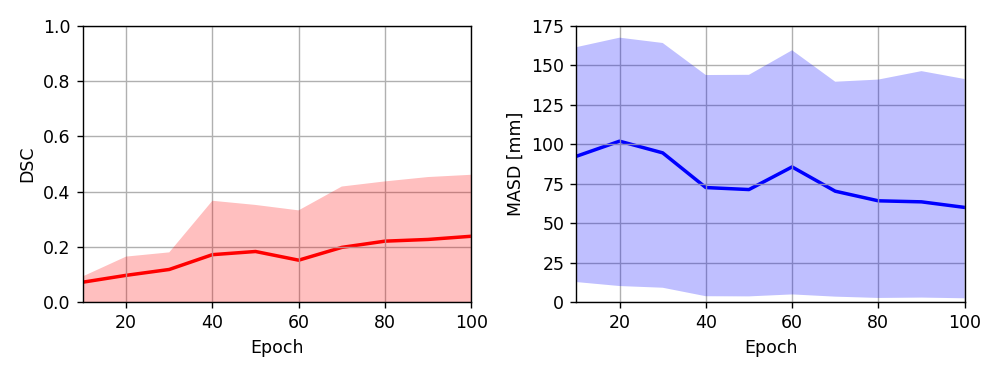

In [10]:
fig, (ax_l, ax_r) = plt.subplots(1,2, figsize=(8,3))

# left curve = DSC
dsc_mean = df.groupby("chk").mean(numeric_only=True)["DSC"].values
dsc_p25 = df.groupby("chk").quantile(0.25)["DSC"].values
dsc_p75 = df.groupby("chk").quantile(0.75)["DSC"].values

ax_l.plot(chkpts, dsc_mean, c="r", lw=2, zorder=0)
ax_l.fill_between(chkpts, dsc_p25, dsc_p75, ec="none", fc="r", alpha=0.25, zorder=1)

# right curve = MASD
masd_mean = df.groupby("chk").mean(numeric_only=True)["MASD [mm]"].values
masd_p25 = df.groupby("chk").quantile(0.25)["MASD [mm]"].values
masd_p75 = df.groupby("chk").quantile(0.75)["MASD [mm]"].values

ax_r.plot(chkpts, masd_mean, c="b", lw=2, zorder=0)
ax_r.fill_between(chkpts, masd_p25, masd_p75, ec="none", fc="b", alpha=0.25, zorder=1)

# cleanup
ax_l.set_xlim(10,100)
ax_r.set_xlim(10,100)

ax_l.set_ylim(0,1)
ax_r.set_ylim(0,175)

ax_l.grid()
ax_r.grid()
ax_l.set_axisbelow(True)
ax_r.set_axisbelow(True)

ax_l.set_xlabel("Epoch")
ax_r.set_xlabel("Epoch")
ax_l.set_ylabel("DSC")
ax_r.set_ylabel("MASD [mm]")

fig.tight_layout()
fig.show()